In [1]:
import tensorflow as tf 
from tensorflow.python.platform import gfile

In [2]:
interpreter = tf.lite.Interpreter(model_path="E:/face_landmark.tflite")
interpreter.allocate_tensors()

In [3]:
# Get input and output tensors.
input_details = interpreter.get_input_details()
print(input_details)

[{'name': 'input_1', 'index': 0, 'shape': array([  1, 192, 192,   3]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0)}]


In [4]:
output_details = interpreter.get_output_details()
print(output_details)

[{'name': 'conv2d_20', 'index': 213, 'shape': array([   1,    1,    1, 1404]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0)}, {'name': 'conv2d_30', 'index': 210, 'shape': array([1, 1, 1, 1]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0)}]


In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img=cv2.imread("E:/eye_blink_detection/blink_image/new_6.jfif")
img=cv2.resize(img,(192,192))
img1=img.copy()
img=img/255
print(img.shape)
img=[img]
img = np.concatenate([arr[np.newaxis] for arr in img])
#print(img.shape)
print(img.shape)
img=img.astype("int32")
#input_shape = input_details[0]['shape']
#input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)
tensor_index = interpreter.get_input_details()[0]['index']
input_tensor_z= tf.convert_to_tensor(img, np.float32)
interpreter.set_tensor(tensor_index, input_tensor_z)


interpreter.invoke()

# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)
landmarks=output_data
plt.imshow(img1)

(192, 192, 3)
(1, 192, 192, 3)
[[[[101.497826  130.0223    -11.405301  ... 142.48123    75.225784
      3.8062937]]]]


In [6]:
print(len(output_data[0][0][0]))

1404


In [7]:
output_data[0][0][0]

array([101.497826 , 130.0223   , -11.405301 , ..., 142.48123  ,
        75.225784 ,   3.8062937], dtype=float32)

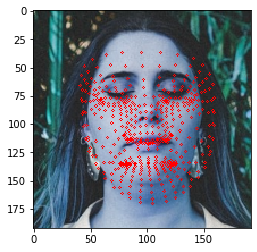

In [8]:
img1_annoted = img1.copy()
for index in range(468):
    x_index = (index)*3
    y_index = (index)*3+1
    x = int(output_data[0][0][0][x_index])
    y = int(output_data[0][0][0][y_index])
    color = (255, 0, 0)
    img1_annoted = cv2.circle(img1_annoted,(x,y), 1, color, 1)
    plt.imshow(img1_annoted)

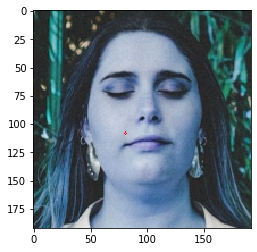

In [9]:
index = 50
x_index = (index-1)*3
y_index = (index-1)*3+1
x = int(output_data[0][0][0][x_index])
y = int(output_data[0][0][0][y_index])
color = (255, 0, 0)
img1_annoted = cv2.circle(img1.copy(),(x,y), 1, color, 1)
plt.imshow(img1_annoted)